## 1. 프로젝트 개요
### 1.1 프로젝트 목적 및 배경 소개

 "금융 데이터 분석을 통한 경제적 인사이트 도출"을 주제로 삼으면서 중요하게 생각했던 점은,데이터 분석을 통해 자세하게 들여다 보지 않으면 파악하지 못하는 오류들이나 새로운 칼럼을 만들어 내어 기존 데이터들로만은 파악하지 못하는 새로운 인사이트를 찾고자 하였습니다.

 와중 부산광역시 지역별 업종별 데이터를 찾게 되었습니다. 위 데이터에는 기준년월을 기준으로 행정동 번호, 집계구역값, 산업명, 매출액구간값, 사업자 수등 저희가 찾고자 했던 경제적 인사이트를 도출하기 좋은 데이터가 있다고 판단되어 위 데이터를 사용하게 되었습니다.

### 1.2 분석 목표 및 기대 효과

첫번째로, 각 년도 별 상권 트렌드를 분석 해보고자 하였습니다. 년도 별 상권 트렌드를 분석해, 1년 사이 상권의 트렌드 변화를 시각화하고자 하였습니다.\
두번째로는 매출액구간값을 기준으로 집계구역별 고소득자를 분석해, 타 지역에 고소득 사업을 추천하고자 하였습니다.
\
\
분석 결과를 통해 부산광역시의 업종 분포 추이와, 집계구역의 특성을 파악하고, 경제적 인사이트를 통한 지역 소득 강화를 목표로 하였습니다.

## 2. 데이터 수집
### 2.1 데이터 출처 설명

https://www.bigdata-finance.kr/dataset/datasetView.do \
"금융 빅데이터 플랫폼"은 국내 각종 금융관련 빅데이터를 판매, 공유하는 사이트입니다.

## 3. 데이터 전처리
### 3.1 데이터 불러오기
<style>
    .input {
        display: none;
    }
</style>

In [ ]:
#주어진 데이터 사용 2021년 데이터
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/user/Desktop/2021.12_상권 지역별 업종별 데이터.csv",encoding='euc-kr')

df_2021 = pd.DataFrame(data)

df_2021 = df_2021.rename(columns={'strd_yymm': '기준년월', 'adng_no': '행정동번호', 'tz_area_val': '집계구역값',
                        'std_ind_ctgo_val': '표준산업분류값', 'std_ind_ctgo_nm': '표준산업분류명',
                        'wkind_scal_nr_val': '종사자규모구간값', 'samt_scal_nr_val': '매출액규모구간값', 
                        'bizr_num': '사업자수'})


df_2022 = pd.read_csv("C:/Users/user/Desktop/2022.12_상권 지역별 업종별 데이터.csv",encoding='cp949')
df_2022 = df_2022.rename(columns={'strd_yymm': '기준년월', 'adng_no': '행정동번호', 'tz_area_val': '집계구역값',
                        'std_ind_ctgo_val': '표준산업분류값', 'std_ind_ctgo_nm': '표준산업분류명',
                        'wkind_scal_nr_val': '종사자규모구간값', 'samt_scal_nr_val': '매출액규모구간값', 
                        'bizr_num': '사업자수'})
display(df_2021)
display(df_2022)

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수
0,202112,2101051,2101051010001,14111,남자용 정장 제조업,1-4명,1-49백만원,1
1,202112,2101051,2101051010001,14112,여자용 정장 제조업,1-4명,1-49백만원,1
2,202112,2101051,2101051010001,17901,문구용 종이제품 제조업,5-9명,100-499백만원,1
3,202112,2101051,2101051010001,18111,경 인쇄업,1-4명,1-49백만원,10
4,202112,2101051,2101051010001,18111,경 인쇄업,1-4명,100-499백만원,3
...,...,...,...,...,...,...,...,...
152543,202112,2131013,2131013210003,96112,두발미용업,1-4명,1-49백만원,1
152544,202112,2131013,2131013210101,56111,한식 음식점업,5-9명,1-49백만원,1
152545,202112,2131013,2131013210101,56220,비알콜 음료점업,1-4명,1-49백만원,1
152546,202112,2131013,2131013210101,59111,일반 영화 및 비디오물 제작업,1-4명,50-99백만원,1


,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수
0,202212,2101051,2101051010001,4121,지반조성 건설업,1-4명,0원,1
1,202212,2101051,2101051010001,31,어로 어업,1-4명,0원,1
2,202212,2101051,2101051010001,3111,원양 어업,1-4명,0원,2
3,202212,2101051,2101051010001,10219,기타 수산동물 가공 및 저장처리업,1-4명,0원,2
4,202212,2101051,2101051010001,1392,"끈, 로프, 망 및 끈가공품 제조업",1-4명,0원,1
...,...,...,...,...,...,...,...,...
104362,202212,2101051,2101051010001,49301,일반 화물 자동차 운송업,100-199명,10000-49999백만원,1
104363,202212,2101051,2101051010001,49309,기타 도로 화물 운송업,1-4명,0원,2
104364,202212,2101051,2101051010001,49401,택배업,1-4명,0원,1
104365,202212,2101051,2101051010001,50112,외항 화물 운송업,1-4명,0원,1


차례대로 2021년, 2022년 상권 데이터 입니다. 두 데이터의 차이점으로는 2022년 데이터에 매출액규모구간값에 '0원'이라는 값이 존재했습니다.

### 3.2 결측치 및 이상치 처리
2022년 상권 데이터의 매출액 규모구간값이 '0원'으로 표기된 값을 제거하고자 하였습니다.

In [83]:
scal_0 = df_2022[df_2022['매출액규모구간값'] == '0원']
scal_0

,기준년월,행정동번호,집계구역값,표준산업분류값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수
0,202212,2101051,2101051010001,4121,지반조성 건설업,1-4명,0원,1
1,202212,2101051,2101051010001,31,어로 어업,1-4명,0원,1
2,202212,2101051,2101051010001,3111,원양 어업,1-4명,0원,2
3,202212,2101051,2101051010001,10219,기타 수산동물 가공 및 저장처리업,1-4명,0원,2
4,202212,2101051,2101051010001,1392,"끈, 로프, 망 및 끈가공품 제조업",1-4명,0원,1
...,...,...,...,...,...,...,...,...
104360,202212,2101051,2101051010001,49301,일반 화물 자동차 운송업,1-4명,0원,8
104363,202212,2101051,2101051010001,49309,기타 도로 화물 운송업,1-4명,0원,2
104364,202212,2101051,2101051010001,49401,택배업,1-4명,0원,1
104365,202212,2101051,2101051010001,50112,외항 화물 운송업,1-4명,0원,1


약 76000개의 데이터가 나왔습니다. 100000여개의 데이터 중 76000개가 소실된다면 데이터 분석에 영향이 갈 수도 있을 것으로 판단하여,
매출액 규모 구간값의 데이터를 우선적으로 분석해 보았습니다.

In [13]:
k = scal_0['표준산업분류명'].value_counts()
l = df_2022['표준산업분류명'].value_counts()
display("전체 데이터",l)
display('매출액규모구간값이 0인 데이터',k)

'전체 데이터'

전자상거래업               3824
비주거용 건물 임대업          2312
기타 부동산 개발 및 공급업      1679
전자상거래 소매업            1201
상품 종합 도매업            1117
                     ... 
공업 고등학교                 1
기타 보험 및 연금관련 서비스업       1
의약품 제조업                 1
종합 소매업                  1
기타 환경 정화 및 복원업          1
Name: 표준산업분류명, Length: 1545, dtype: int64

'매출액규모구간값이 0인 데이터'

전자상거래업                   3698
기타 부동산 개발 및 공급업          1565
비주거용 건물 임대업              1318
전자상거래 소매업                1034
부동산 임대업                   894
                         ... 
국제 및 외국기관                   1
주한 외국공관                     1
식품 위생용 종이 상자 및 용기 제조업       1
의료용 물질 및 의약품 제조업            1
기타 환경 정화 및 복원업              1
Name: 표준산업분류명, Length: 1530, dtype: int64

정확히는 아니더라도, "0원"의 값을 가지는 데이터가 전체 데이터의 경향을 따르는 모습을 보였습니다. \
이후로 종합 소매업 같이 value값이 적은 데이터가 많이 유실되는지 파악해 보았습니다.

In [14]:
a = df_2022['표준산업분류명'].value_counts()
b = pd.DataFrame(a)
c = b[b['표준산업분류명'] <= 50]
c = c.rename_axis('표준산업분류명').rename(columns={'표준산업분류명': ''})

d = scal_0['표준산업분류명'].value_counts()
f = pd.DataFrame(d)
g = f[f['표준산업분류명'] <= 50]
g = g.rename_axis('표준산업분류명').rename(columns={'표준산업분류명': ''})

display(c)
display(g)

,
표준산업분류명,
투자 자문업,50
편조의복 제조업,50
기타 무선 통신장비 제조업,50
자동차용 신품 동력 전달장치 제조업,50
기체연료 및 관련제품 도매업,50
...,...
공업 고등학교,1
기타 보험 및 연금관련 서비스업,1
의약품 제조업,1


,
표준산업분류명,
일반 서적 출판업,50
광고업,50
투자 자문업,50
음·식료품 및 담배 중개업,50
음·식료품 및 담배 가공기계 제조업,50
...,...
국제 및 외국기관,1
주한 외국공관,1
식품 위생용 종이 상자 및 용기 제조업,1


100개 정도의 데이터가 유실된 것을 파악하였습니다.\
"0원"의 값을 가지는 데이터를 제거하고 하더라도, 데이터 규모만 작을 뿐, 전체 데이터의 경향을 가지기 때문에 사용해도 상관 없을 것 같다는 결론을 내렸습니다.

In [106]:
df_2022 = df_2022[df_2022['매출액규모구간값'] != '0원']

### 3.3 데이터 타입 변환
종사자규모구간값, 매출액규모구간값,사업자 수가 범주형으로 표기되어 있어 변환하였습니다.

In [ ]:
def preprocess_dataframe(df):
    # 종사자규모구간값 변환
    df['종사자규모구간값'] = df['종사자규모구간값'].replace({
        '1-4명': 3, '5-9명': 7, '10-19명': 15,
        '20-49명': 35, '50-99명': 75, '100-199명': 150,
        '200-299명': 250, '300명 이상': 300
    })

    # 매출액규모구간값 변환
    df['매출액규모구간값'] = df['매출액규모구간값'].replace({
        '1-49백만원': 25000000, '50-99백만원': 75000000,
        '100-499백만원': 300000000, '500-999백만원': 750000000,
        '1000-4999백만원': 3000000000, '5000-9999백만원': 7500000000,
        '10000-49999백만원': 30000000000, '50000백만원이상': 50000000000
    })

    # 변경된 값을 숫자로 형변환
    df['종사자규모구간값'] = pd.to_numeric(df['종사자규모구간값'])
    df['매출액규모구간값'] = pd.to_numeric(df['매출액규모구간값'])
    df['사업자수'] = pd.to_numeric(df['사업자수'])

# 함수를 사용하여 데이터프레임 변환
preprocess_dataframe(df_2021)
preprocess_dataframe(df_2022)

# 변경된 DataFrame을 출력
display(df_2021)
display(df_2022)

### 3.4 사업자1인당소득, 소득분위 추가

In [108]:
def calculate_and_categorize_income(df):
    # 계산
    df['사업자 1인당 수익'] = ((df['매출액규모구간값'] / 12 - df['종사자규모구간값'] * 2500000)
                               / df['사업자수'])

    # 소수점을 반올림하여 정수로 변환
    df['사업자 1인당 수익'] = df['사업자 1인당 수익'].round(0).astype(int)
# 함수 사용
calculate_and_categorize_income(df_2021)
calculate_and_categorize_income(df_2022)

In [109]:
# 음수값 제외
df_2021 = df_2021[df_2021['사업자 1인당 수익'] >= 0]
df_2022 = df_2022[df_2022['사업자 1인당 수익'] >= 0]

In [ ]:
def get_income_category(income, thresholds):
    if income <= thresholds[0.25]:
        return 1
    elif income <= thresholds[0.5]:
        return 2
    elif income <= thresholds[0.75]:
        return 3
    else:
        return 4

# '소득분위' 열 추가
income_thresholds_2021 = df_2021['사업자 1인당 수익'].quantile([0.25, 0.5, 0.75])
df_2021['소득분위'] = df_2021['사업자 1인당 수익'].apply(get_income_category, thresholds=income_thresholds_2021)

income_thresholds_2022 = df_2022['사업자 1인당 수익'].quantile([0.25, 0.5, 0.75])
df_2022['소득분위'] = df_2022['사업자 1인당 수익'].apply(get_income_category, thresholds=income_thresholds_2022)

display(df_2021)
display(df_2022)

In [111]:
def preprocess_dataframe(df):
    # '집계구역값' 처리
    start_value = df['집계구역값'].min()
    end_value = df['집계구역값'].max()
    interval = (end_value - start_value + 1) // 10
    df['집계구역값'] = pd.cut(df['집계구역값'], bins=range(start_value, end_value+interval, interval), labels=range(1, 11), 
                         include_lowest=True)

    # 열 삭제
    columns_to_drop = ['행정동번호', '표준산업분류값']
    df.drop(columns=columns_to_drop, inplace=True)

# 예시 사용
preprocess_dataframe(df_2021)
preprocess_dataframe(df_2022)

display(df_2021)
display(df_2022)

,기준년월,집계구역값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익,소득분위
2,202112,1,문구용 종이제품 제조업,7,300000000,1,7500000,1
4,202112,1,경 인쇄업,3,300000000,3,5833333,1
7,202112,1,스크린 인쇄업,7,300000000,1,7500000,1
9,202112,1,기타 인쇄업,3,300000000,2,8750000,1
10,202112,1,기타 인쇄업,7,750000000,1,45000000,3
...,...,...,...,...,...,...,...,...
152535,202112,10,기관구내식당업,7,300000000,1,7500000,1
152536,202112,10,비주거용 건물 임대업,3,300000000,1,17500000,1
152538,202112,10,제조업 회사본부,3,300000000,1,17500000,1
152539,202112,10,기타 산업 회사본부,3,3000000000,1,242500000,4


,기준년월,집계구역값,표준산업분류명,종사자규모구간값,매출액규모구간값,사업자수,사업자 1인당 수익,소득분위
14,202212,1,경 인쇄업,3,300000000,1,17500000,1
24,202212,1,절삭가공 및 유사처리업,3,750000000,1,55000000,2
26,202212,1,강선 건조업,3,750000000,1,55000000,2
31,202212,1,간판 및 광고물 제조업,3,300000000,1,17500000,1
58,202212,1,기타 반도체 소자 제조업,7,750000000,1,45000000,2
...,...,...,...,...,...,...,...,...
104350,202212,1,상품 종합 도매업,3,3000000000,1,242500000,3
104351,202212,1,상품 종합 도매업,3,7500000000,1,617500000,4
104357,202212,1,차량용 주유소 운영업,3,3000000000,1,242500000,3
104361,202212,1,일반 화물 자동차 운송업,3,750000000,1,55000000,2


## 4. 데이터 탐색 및 시각화


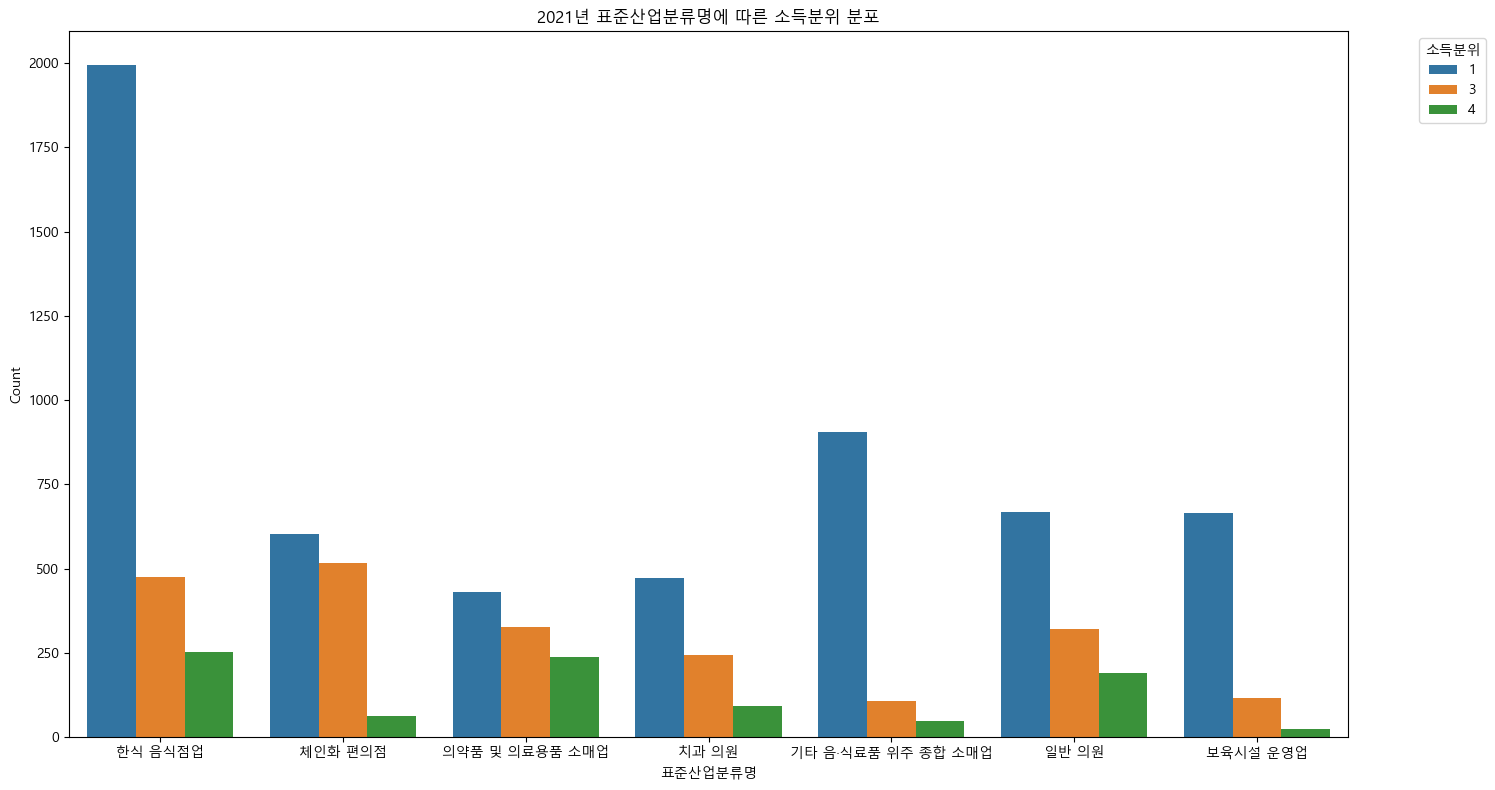

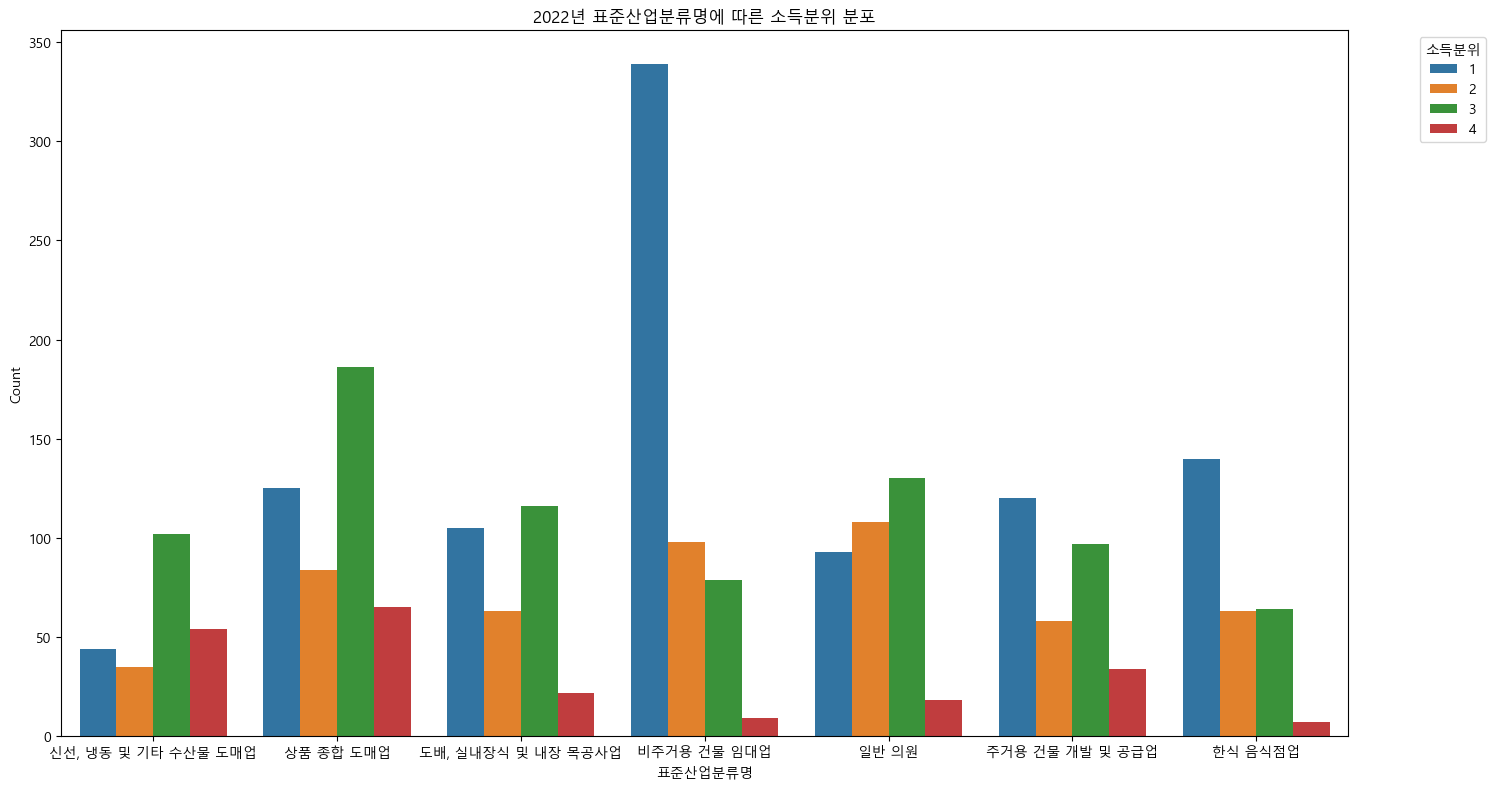

In [90]:
import matplotlib.font_manager as fm

def plot_income_distribution(df, title):
    # 1000개 이상인 표준산업분류명 필터링
    industry_counts = df['표준산업분류명'].value_counts()
    industry_counts_filtered = industry_counts.nlargest(7)
    df_filtered = df[df['표준산업분류명'].isin(industry_counts_filtered.index)]
    # 소득분위 분포 확인
    plt.figure(figsize=(15, 8))
    sns.countplot(x='표준산업분류명', hue='소득분위', data=df_filtered)
    plt.title(title)
    plt.xlabel('표준산업분류명')
    plt.ylabel('Count')
    plt.xticks(rotation=360, ha='center')  # 텍스트를 오른쪽으로 90도 회전
    plt.legend(title='소득분위', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()  # 그래프가 잘리지 않도록 조절
    plt.show()
    
# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트의 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()

# 그래프 그리기
plot_income_distribution(df_2021, '2021년 표준산업분류명에 따른 소득분위 분포')
plot_income_distribution(df_2022, '2022년 표준산업분류명에 따른 소득분위 분포')

년도별 표준산업분류명에 따른 소득분위 분포표입니다.\
2021년에는 소득분위가 2인 직종들이 없어 1소득분위와 나머지간의 소득 격차가 큰것으로 나타났습니다.\
2021년과 2022년의 트렌드 변화를 분석해보고자 하였으나, 2022년에 데이터가 유실된 탓인지 상권의 트렌드가 급격하게 변화되었습니다.\
(저 많던 편의점, 보육 시설들이 사라졌을리는 없을텐데 말이죠..)\
상권 트렌드 분석하기엔 주어진 데이터로는 어려움이 있었습니다.\
한식 음식점업, 의료산업, 상품 도소매업은 유지되었으며, 2021년에는 편의점, 보육시설등이 강세였다면 2022년에 들어서 목공사업 및 건물 임대업의 분포가 많이 늘었다는것을 확인할 수 있었습니다.

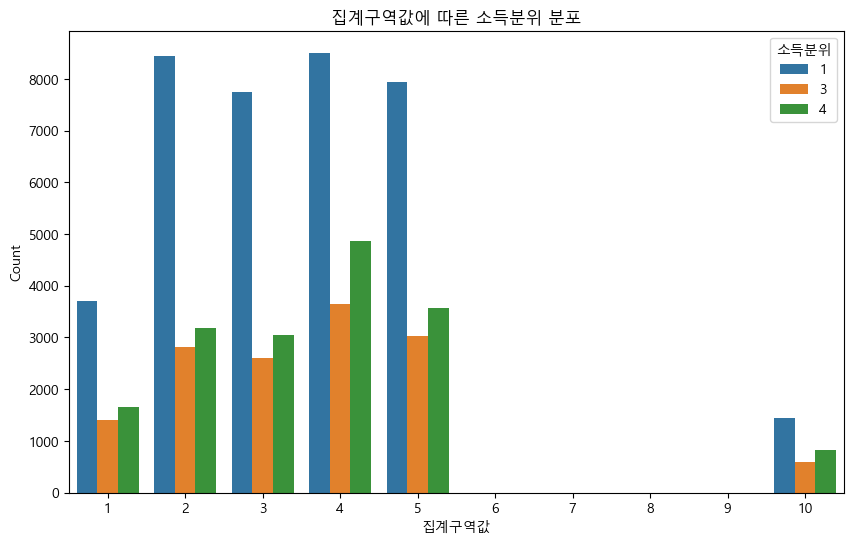

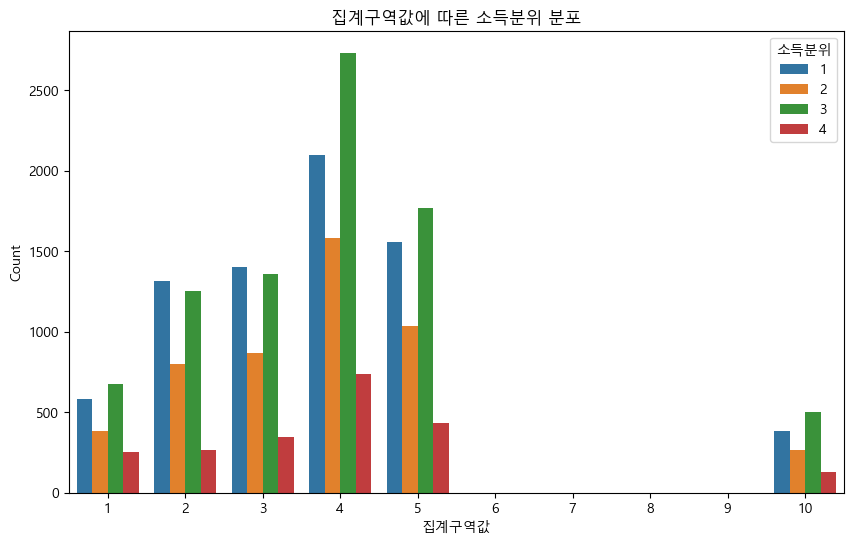

In [48]:
def plot_income_distribution_by_area(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='집계구역값', hue='소득분위', data=df)
    plt.title('집계구역값에 따른 소득분위 분포')
    plt.xlabel('집계구역값')
    plt.ylabel('Count')
    plt.show()

# 함수 사용
plot_income_distribution_by_area(df_2021)
plot_income_distribution_by_area(df_2022)

집계구역값에 따른 소득분위 분포입니다.\
행정동 번호를 10개단위로 묶어 하나의 집계구역으로 표시하고, 10개의 집계구역으로 나누었습니다.\
표본수의 차이가 있지만, 공통적으로 4번 집계구역의 고소득분위의 비율이 높은것으로 나타났습니다.

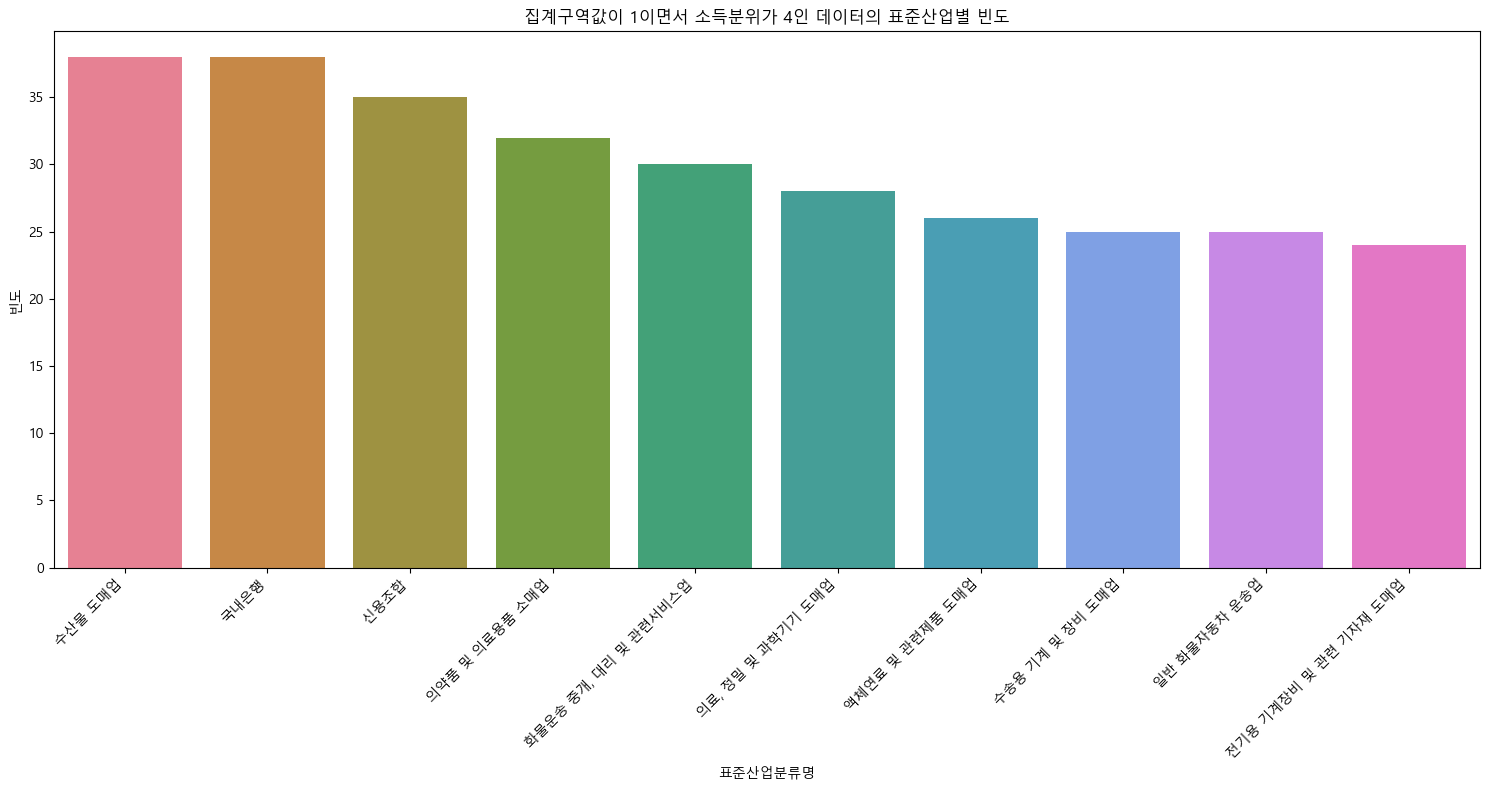

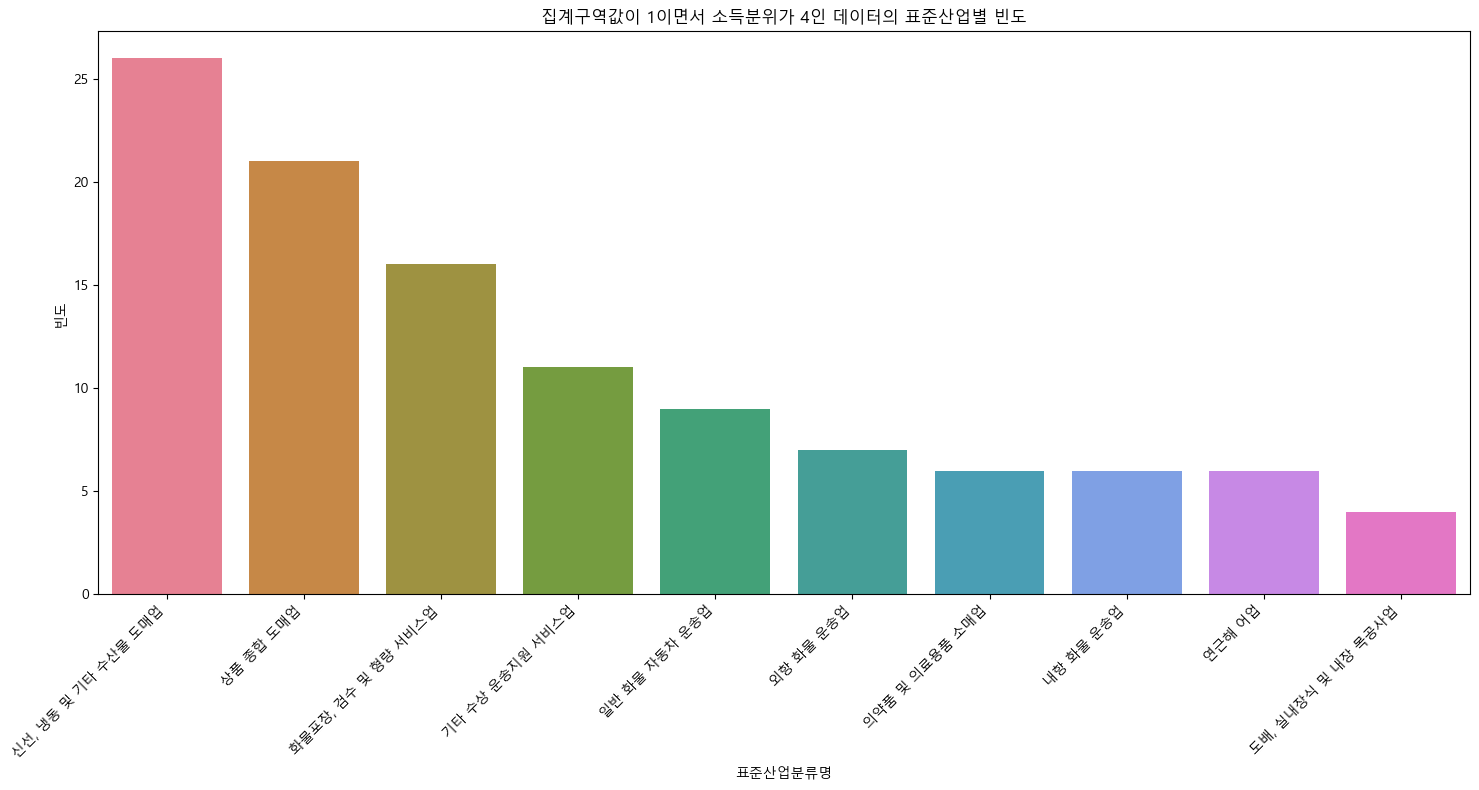

In [66]:
def plot_industry_counts(df, aggregate_value, income_category):
    # 해당 집계구역값과 소득분위에 해당하는 데이터 추출
    df_subset = df[(df['집계구역값'] == aggregate_value) & (df['소득분위'] == income_category)]

    # 표준산업별 빈도 계산
    industry_counts = df_subset['표준산업분류명'].value_counts()
    industry_counts_filtered = industry_counts.nlargest(10)
    
    df_filtered = df[df['표준산업분류명'].isin(industry_counts_filtered.index)]
    # seaborn에서 제공하는 색상 팔레트 사용
    colors = sns.color_palette('husl', n_colors=len(industry_counts_filtered))

    # 데이터 시각화
    plt.figure(figsize=(15, 8))
    sns.barplot(x=industry_counts_filtered.index, y=industry_counts_filtered.values, palette=colors)
    plt.title(f'집계구역값이 {aggregate_value}이면서 소득분위가 {income_category}인 데이터의 표준산업별 빈도')
    plt.xlabel('표준산업분류명')
    plt.ylabel('빈도')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 원하는 집계구역값과 소득분위를 지정하여 함수 호출
plot_industry_counts(df_2021, 1, 4)
plot_industry_counts(df_2022, 1, 4)

2021년과 2022년 모두 수산물 관련 도매업이 큰 수익이 있다는 것을 알 수 있습니다. 어업이 주로 발전되있다는 것을 알 수 있습니다

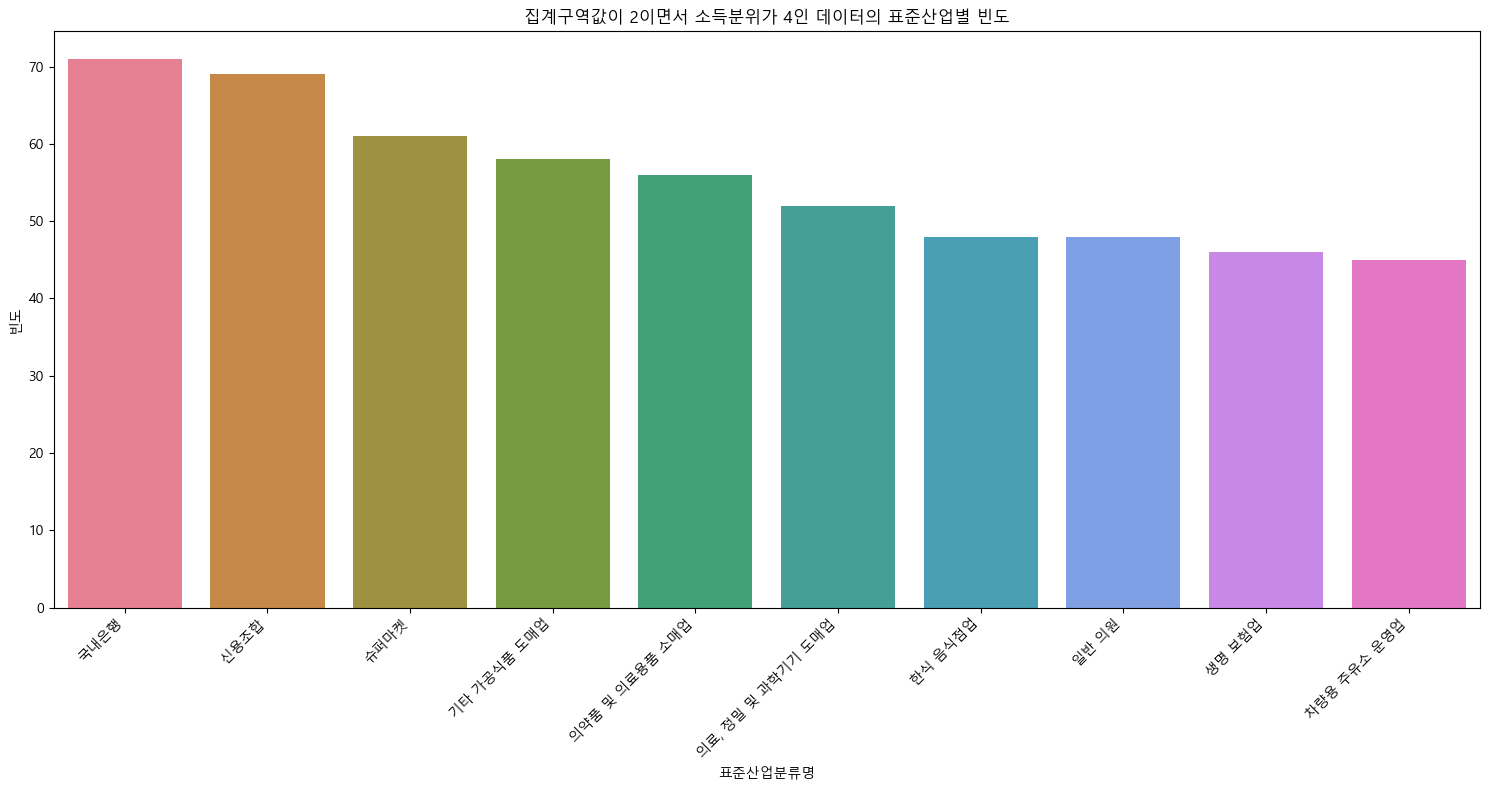

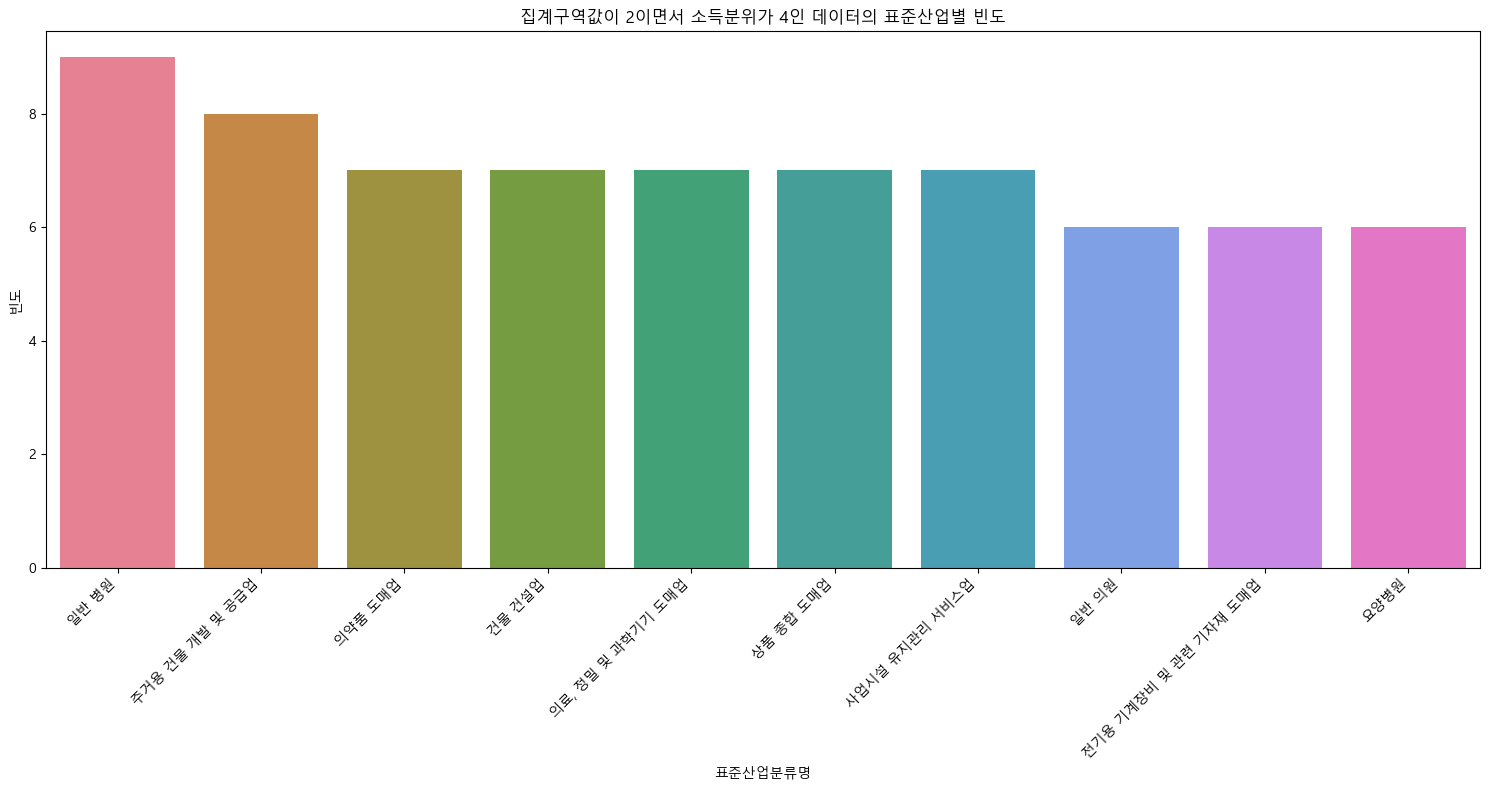

In [67]:
plot_industry_counts(df_2021, 2, 4)
plot_industry_counts(df_2022, 2, 4)

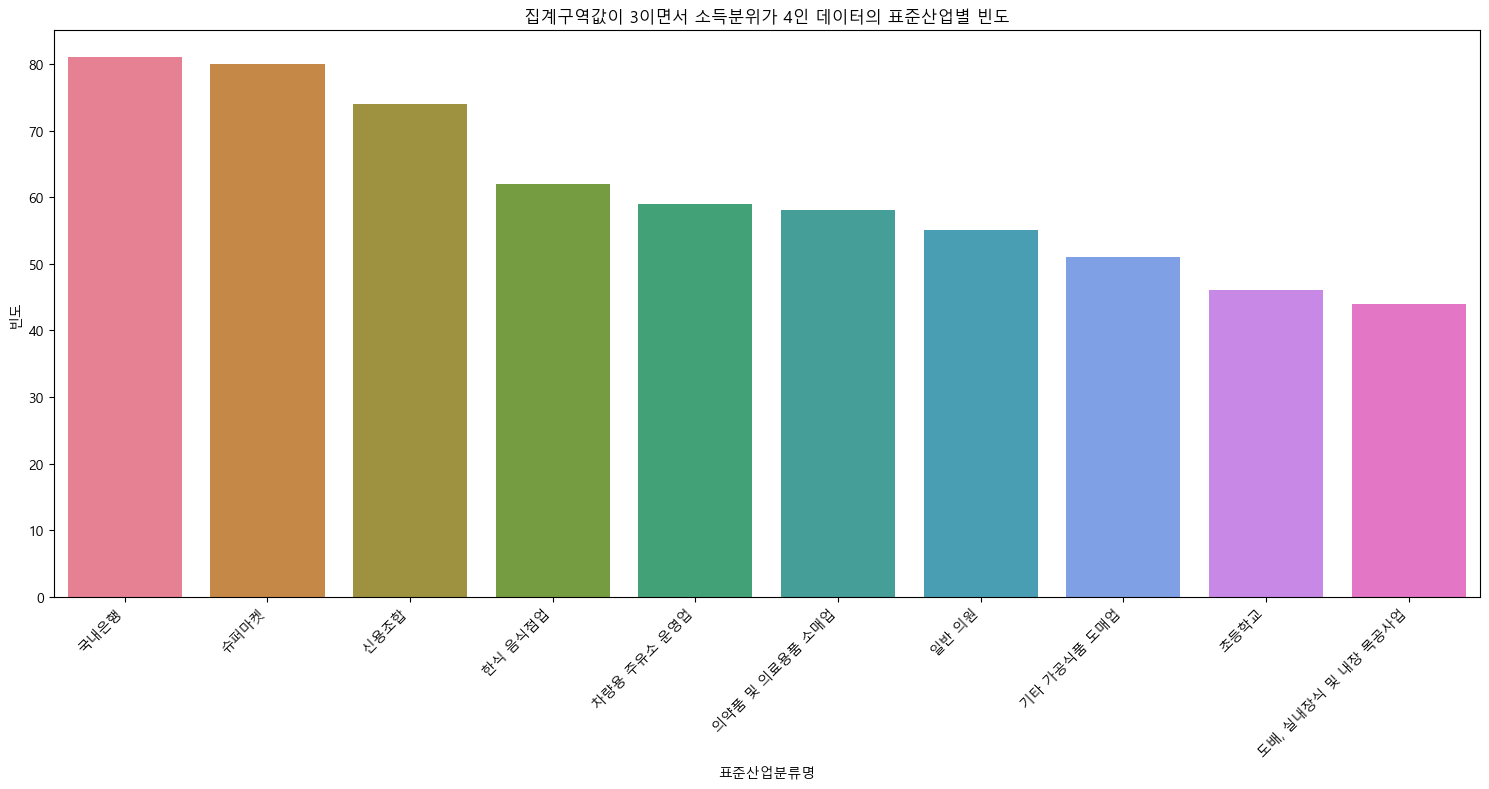

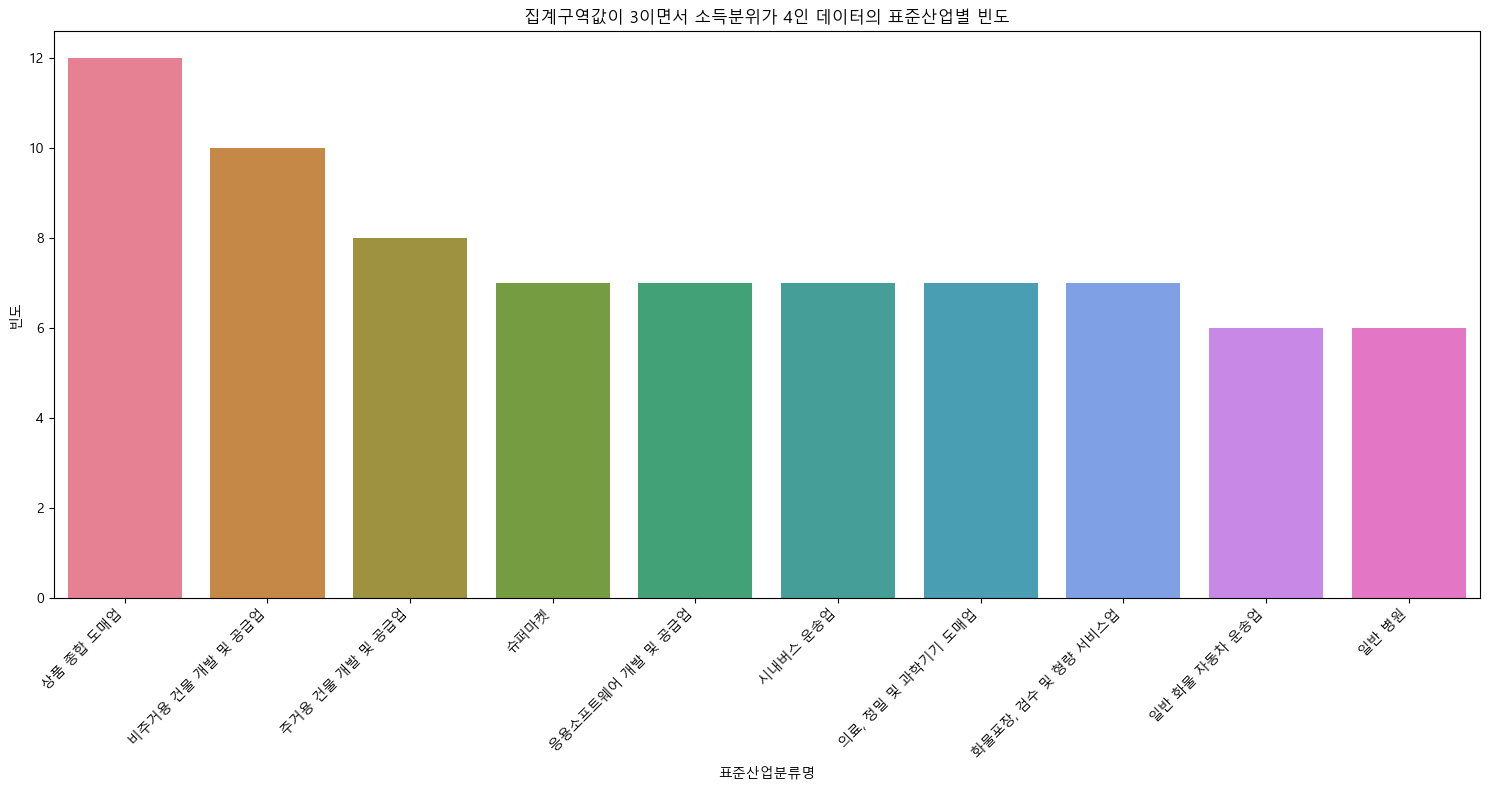

In [68]:
plot_industry_counts(df_2021, 3, 4)
plot_industry_counts(df_2022, 3, 4)

은행과 병원이 고소득의 주를 이루고 있어, 도시지역임을 추정할 수 있었습니다.

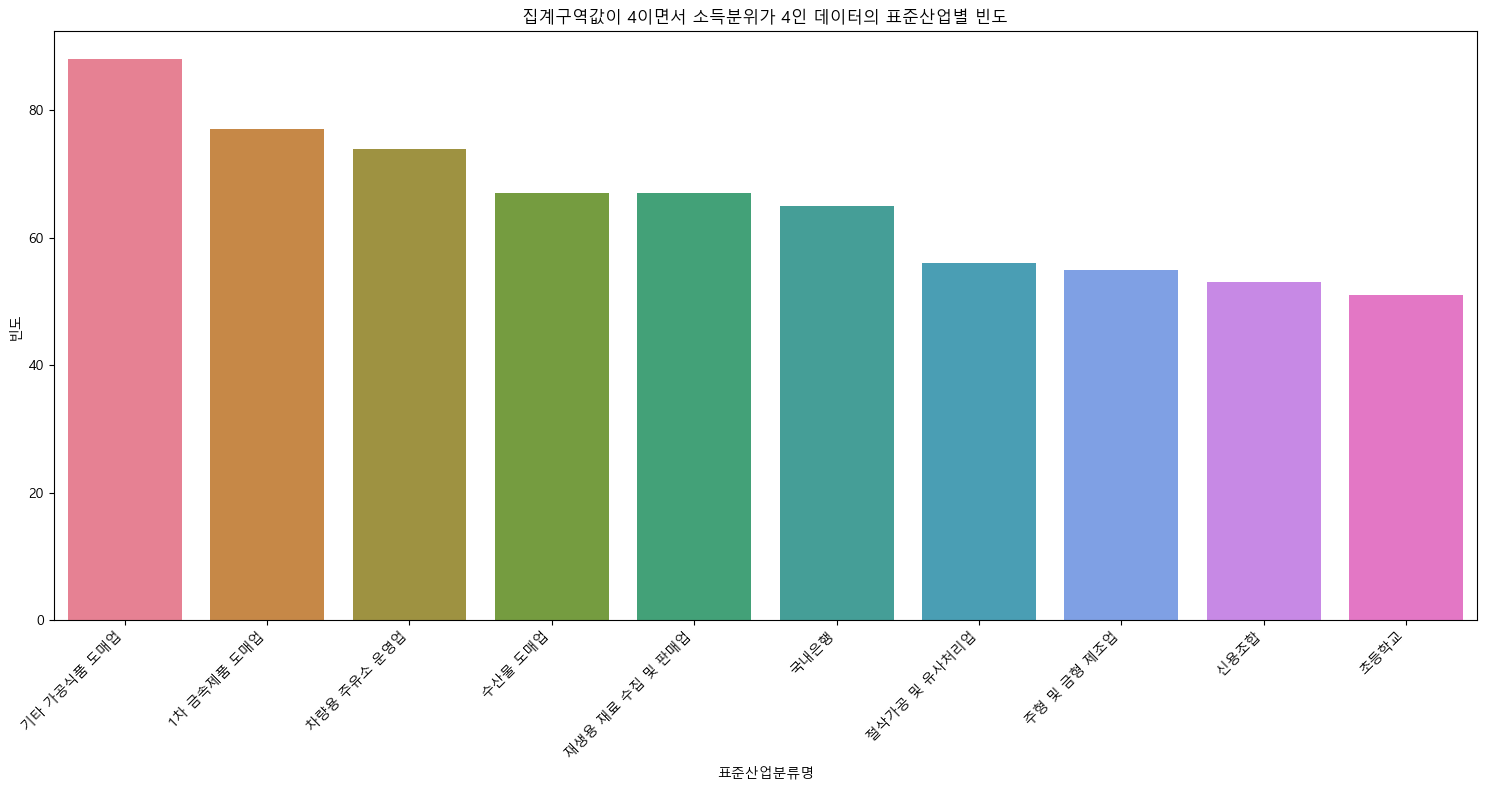

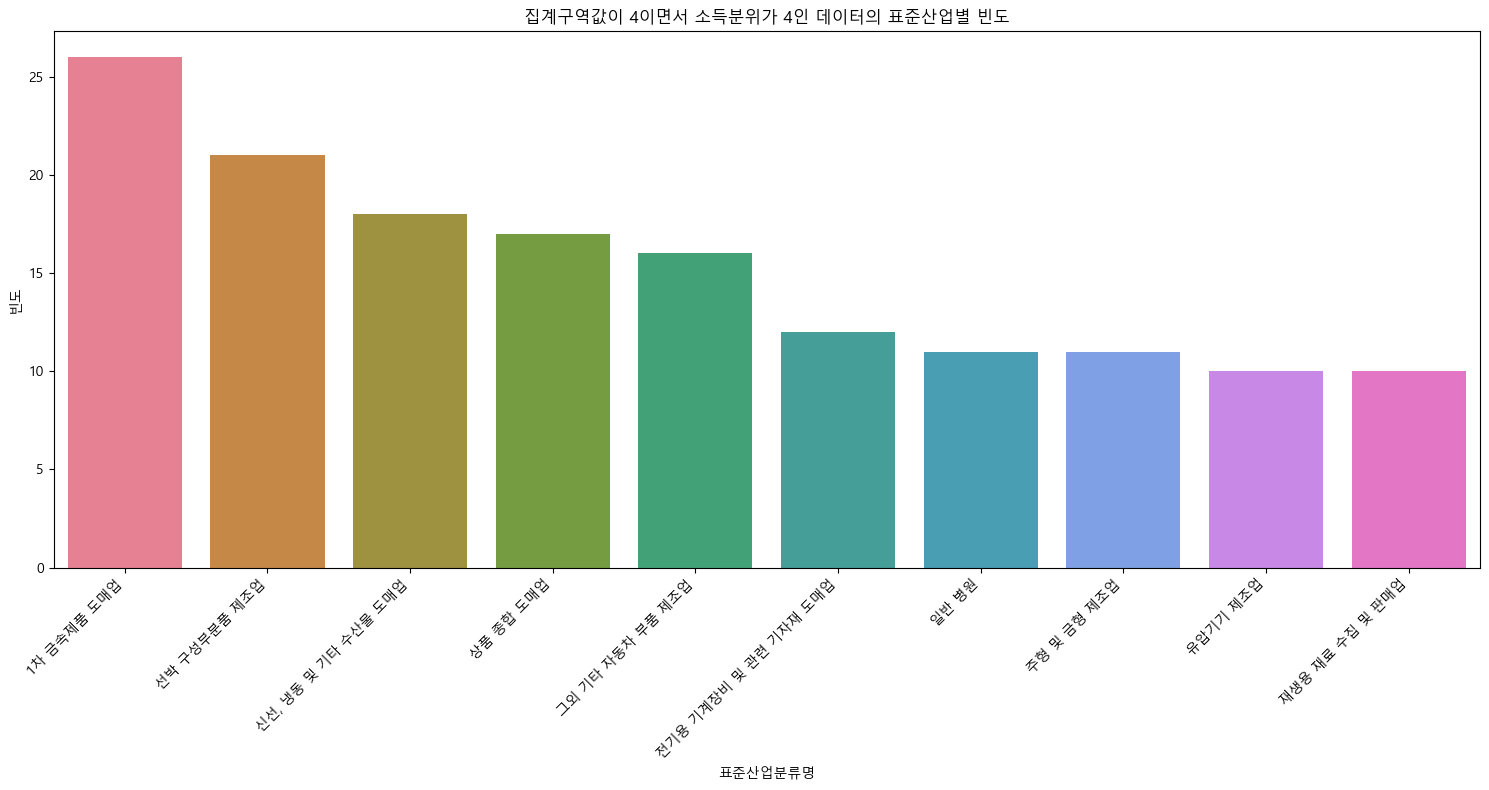

In [69]:
plot_industry_counts(df_2021, 4, 4)
plot_industry_counts(df_2022, 4, 4)

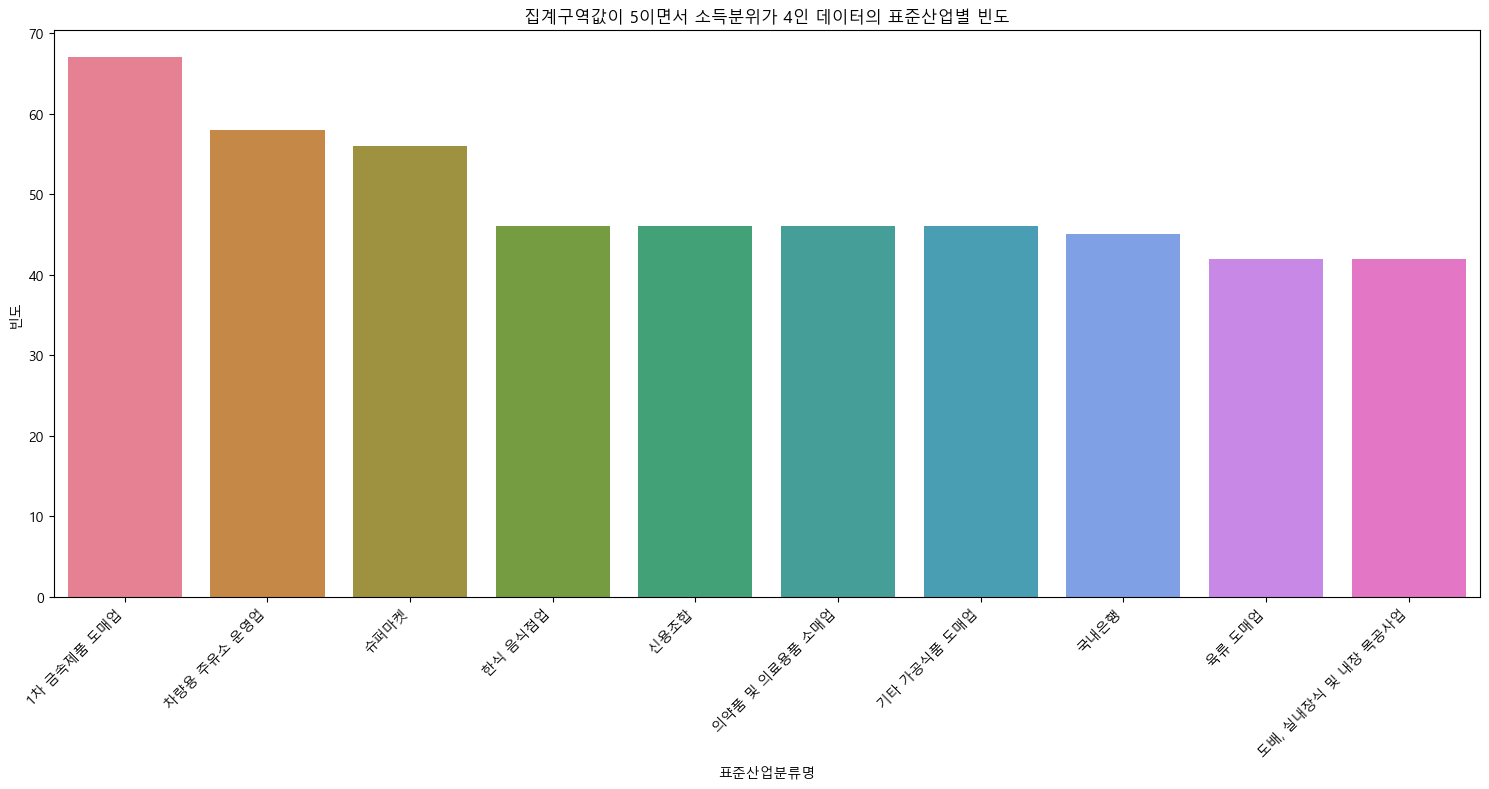

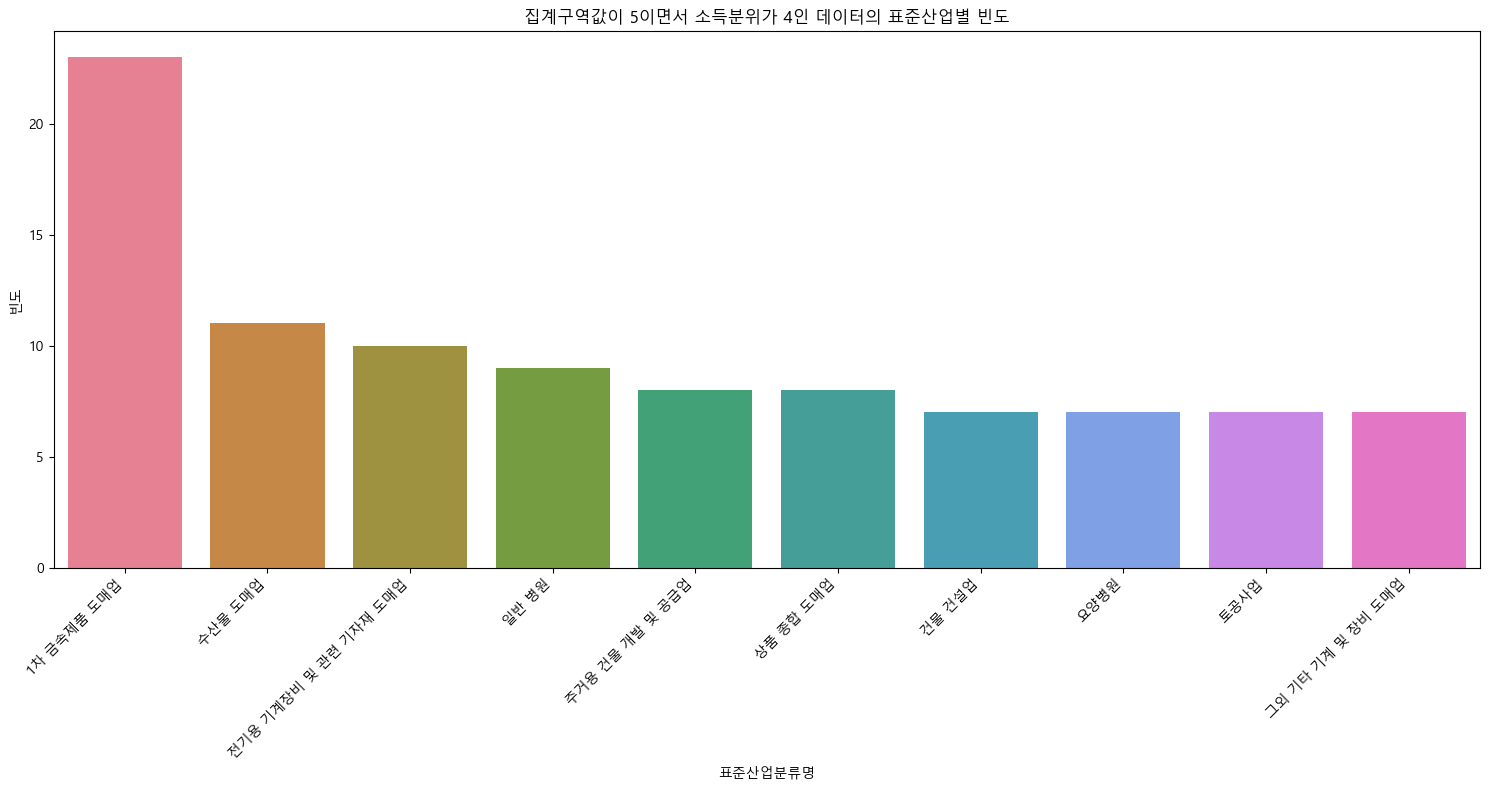

In [70]:
plot_industry_counts(df_2021, 5, 4)
plot_industry_counts(df_2022, 5, 4)

금속 관련 제조업, 수산물 도매업이 주를 이루고 있음을 알 수 있습니다.

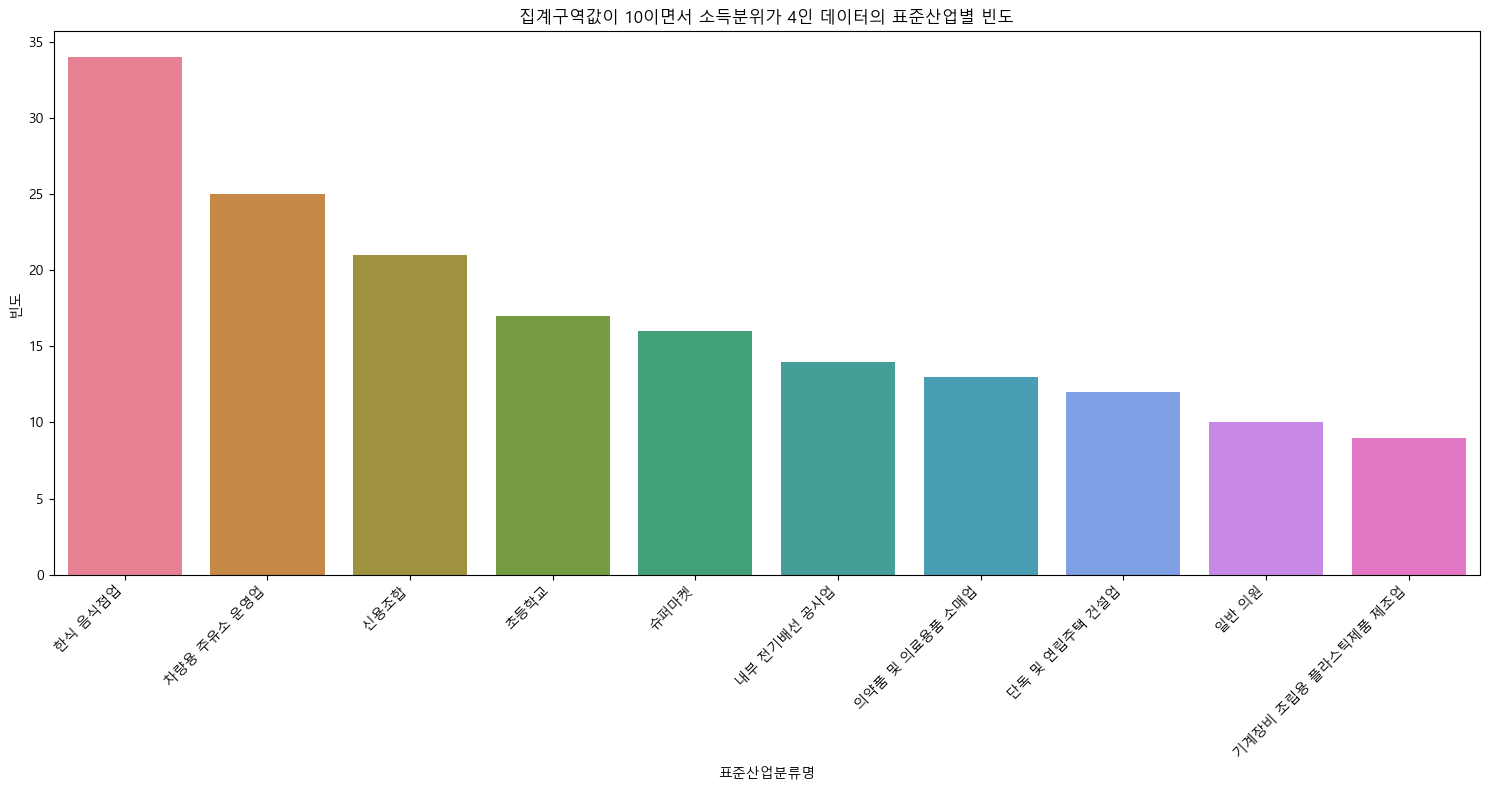

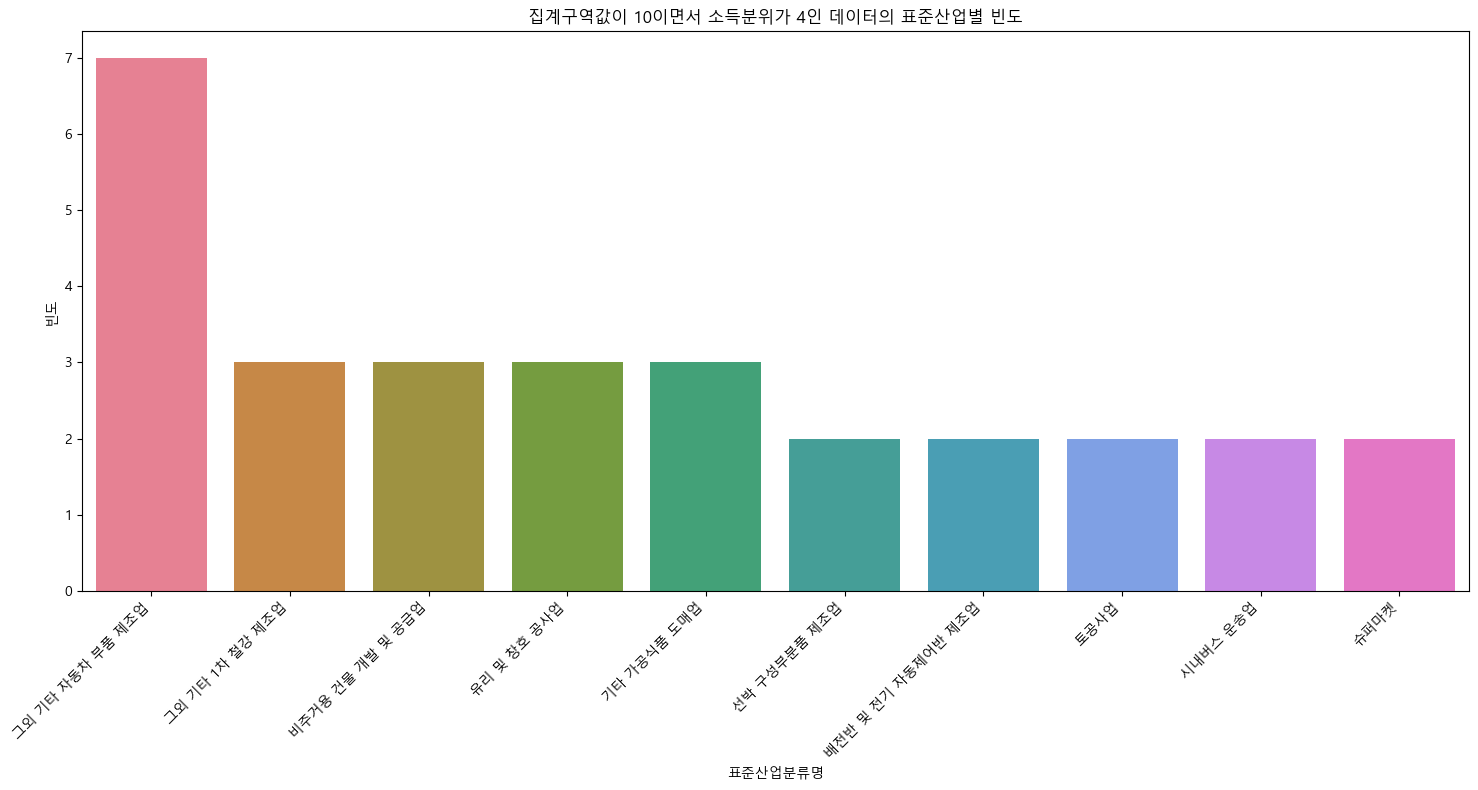

In [71]:
plot_industry_counts(df_2021, 10, 4)
plot_industry_counts(df_2022, 10, 4)

집계구역 별 고소득자의 분포를 분석해본 결과, 대체적으로 은행, 수산물 도매업, 금속업, 부동산 중개업이 소득이 크게 나타나는것으로
분석되었습니다.\
또한 집계구역 별 특징으로는 집계구역 1은 어업이 산업의 주를 이루고 있었으며 2,3은 도시지역임을 알 수 있었고, 4,5는 금속업을 주로 이루고 있었으며 10구역은 여러 산업의 제조를 담당하는것으로 보아, 땅이 넓은 시골지역임을 알 수 있었습니다.

In [149]:
bb = df_2021[df_2021['소득분위'] == 4]
result_df = pd.pivot_table(bb, values='사업자 1인당 수익', index='표준산업분류명', columns='집계구역값')
result_df = result_df.fillna(0).round(0).astype(int)
result_df['평균'] = result_df.mean(axis=1).round(0)
top_100_industries = result_df.nlargest(100, '평균')

# 값이 0인 칼럼과 해당 행의 인덱스 추출
zero_values = {}
for index, row in top_100_industries.iterrows():
    zero_columns = row.index[row.eq(0)]
    if len(zero_columns) > 0:
        zero_values[index] = zero_columns

# 결과 출력
for index, columns in zero_values.items():
    print(f"{index}, : {columns}")

종합 병원, : Index([10], dtype='object', name='집계구역값')
기타 대형 종합 소매업, : Index([1, 5], dtype='object', name='집계구역값')
대학교, : Index([10], dtype='object', name='집계구역값')
시내버스 운송업, : Index([1], dtype='object', name='집계구역값')
신문 발행업, : Index([3, 4, 10], dtype='object', name='집계구역값')
수상 화물 취급업, : Index([5, 10], dtype='object', name='집계구역값')
전문대학, : Index([1, 2, 5], dtype='object', name='집계구역값')
콜센터 및 텔레마케팅 서비스업, : Index([10], dtype='object', name='집계구역값')
자동차용 동력전달장치 제조업, : Index([1, 2], dtype='object', name='집계구역값')
치과 병원, : Index([1, 10], dtype='object', name='집계구역값')
방사선진단 및 병리검사 의원, : Index([10], dtype='object', name='집계구역값')
전기회로 개폐, 보호 및 접속 장치 제조업, : Index([1], dtype='object', name='집계구역값')
도시철도 운송업, : Index([1], dtype='object', name='집계구역값')
증권 중개업, : Index([10], dtype='object', name='집계구역값')
한방 병원, : Index([2, 10], dtype='object', name='집계구역값')
곡물 제분업, : Index([1, 2], dtype='object', name='집계구역값')
철도 운송지원 서비스업, : Index([3, 5, 10], dtype='object', name='집계구역값')
공업 고등학교, : Index([10], dtype='o

마지막으로, 다른 집계구역에는 없는 고소득 산업을 추천하고자 하였습니다.\
고소득을 가지는 산업 수익의 평균을 구하고 그 산업이 존재하지 않는 집계구역을 나타내어 분석하였습니다.\
고소득을 가지는 100개의 산업을 추출한 결과, 제조업이 고소득을 많이 이루기에 제외하고, \
의미있는 데이터로는 증권 중개업은 10번 집계구역에, \
한방 병원2,10집계구역에 없으며,보증 보험업, 생명 보험업 또한 10번 집계구역에 존재하지 않았습니다.

 추가로 소득을 기준으로 산정한 표이기 때문에 0원으로 나타내는 구역은 해당 산업이 없다고 볼 수 있습니다. 사회교육시설을 10번 집계구역에 설치하는것이 지역 발전에 도움이 될 것이라는 인사이트를 얻을 수 있었습니다.